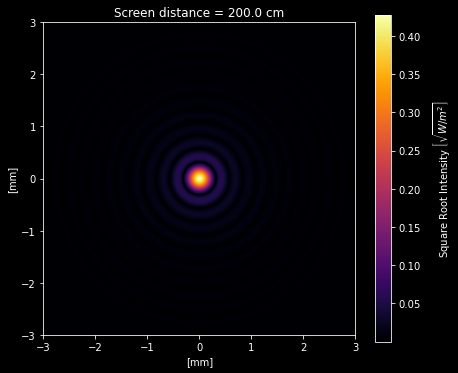

In [14]:
import diffractsim
diffractsim.set_backend("CPU") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, nm, mm, cm, CircularAperture, Lens

F = MonochromaticField(
    wavelength = 360  * nm, extent_x=13. * mm, extent_y=13. * mm, Nx=2000, Ny=2000, intensity =0.01
)

F.add(CircularAperture(radius = 0.7*mm))
F.propagate(100*cm)
F.add(Lens(f = 100*cm)) # Just remove this command to see the pattern without lens
F.propagate(100*cm)
rgb = F.get_intensity()

F.plot_intensity(F.get_intensity(), xlim=[-3*mm,3*mm], ylim=[-3*mm,3*mm] , square_root = True)


In [17]:
# save image to file
import numpy as np
from PIL import Image
Image.fromarray((rgb*255).astype(np.uint8)).save("/Users/emanuelevivoli/asmara/diffractsim/examples/apertures/hologram_text.png")

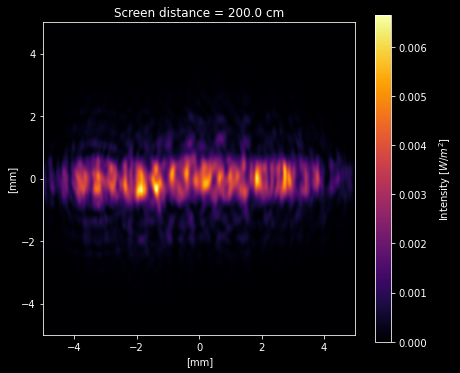

In [24]:
import diffractsim
diffractsim.set_backend("CPU") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, nm, mm, cm, CircularAperture, Lens, ApertureFromImage

F = MonochromaticField(
    wavelength = 360  * nm, extent_x=100. * mm, extent_y=100. * mm, Nx=2000, Ny=2000, intensity =0.01
)

F.add(ApertureFromImage("/Users/emanuelevivoli/asmara/diffractsim/examples/apertures/hologram_text.png", image_size=(15 * mm, 15 * mm), simulation = F))
F.propagate(200*cm)

F.plot_intensity(F.get_intensity(), xlim=[-5*mm,5*mm], ylim=[-5*mm,5*mm])


In [ ]:
import diffractsim
diffractsim.set_backend("CPU") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import PolychromaticField,ApertureFromImage, cf, mm, cm

F = PolychromaticField(
    spectrum=1.5 * cf.illuminant_d65,
    extent_x=20 * mm,
    extent_y=20 * mm,
    Nx=1600,
    Ny=1600,
)

F.add(ApertureFromImage("/Users/emanuelevivoli/asmara/diffractsim/examples/apertures/diffraction_text.jpg", image_size=(15 * mm, 15 * mm), simulation = F))


F.propagate(z=150*cm)
rgb = F.get_colors()

F.plot_colors(rgb, xlim=[-10*mm, 10*mm], ylim=[-10*mm, 10*mm])

In [6]:
import numpy as np
np.min(rgb), np.max(rgb)

(0.00013714020019085706, 0.9999929831955333)

In [7]:
# save image to file

from PIL import Image
Image.fromarray((rgb*255).astype(np.uint8)).save("/Users/emanuelevivoli/asmara/diffractsim/examples/apertures/hologram_text.png")

100% |########################################################################|


Computation Took 33.095438718795776


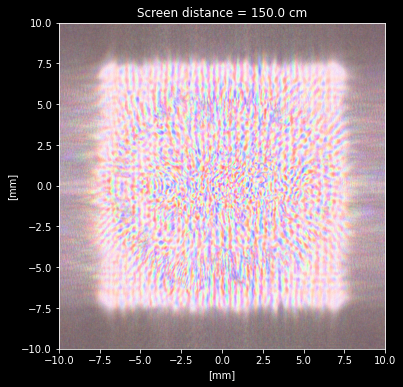

In [12]:
F = PolychromaticField(
    spectrum=1.5 * cf.illuminant_d65,
    extent_x=20 * mm,
    extent_y=20 * mm,
    Nx=1600,
    Ny=1600,
)

# load the hologram as a phase mask aperture
F.add(ApertureFromImage(
     amplitude_mask_path= "/Users/emanuelevivoli/asmara/diffractsim/examples/apertures/white_background.png", 
     phase_mask_path= "/Users/emanuelevivoli/asmara/diffractsim/examples/apertures/hologram_text.png", image_size=(15 * mm, 15 * mm), simulation = F))


F.propagate(z=150*cm)
rgb = F.get_colors()

F.plot_intensity(rgb, xlim=[-10*mm, 10*mm], ylim=[-10*mm, 10*mm])

In [11]:
from PIL import Image
import numpy as np
img = Image.open("/Users/emanuelevivoli/asmara/diffractsim/examples/apertures/9.jpg")
img = np.array(img)/255 # convert to grayscale
img = 1 - img # invert the image
Image.fromarray((img*255).astype(np.uint8)).save("/Users/emanuelevivoli/asmara/diffractsim/examples/apertures/9_white.png")

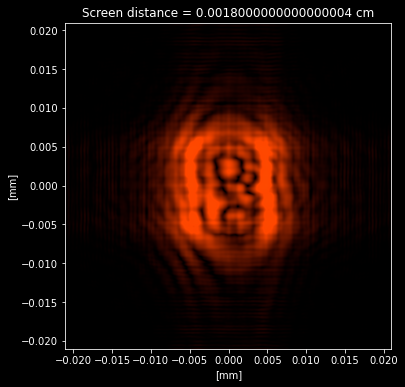

In [18]:

import diffractsim
diffractsim.set_backend("CPU") 
from diffractsim import MonochromaticField,ApertureFromImage, mm, cm, nm

λ = 600 * nm

F = MonochromaticField(
    wavelength=600*nm, extent_x=70*λ, extent_y=70*λ, Nx=1024, Ny=1024, intensity = 0.01
)

F.add(ApertureFromImage("/Users/emanuelevivoli/asmara/diffractsim/examples/apertures/9_white.png", image_size=(25*λ, 25 *λ), simulation = F, amplitude_mask_extent = [-1,1]))


F.propagate(z=30*λ)
rgb = F.get_colors(scale=nm)

F.plot_colors(rgb)

In [19]:
# save image to file

from PIL import Image
Image.fromarray((rgb*255).astype(np.uint8)).save("/Users/emanuelevivoli/asmara/diffractsim/examples/apertures/intensity.png")

In [21]:
S = MonochromaticField(
     wavelength=600*nm, extent_x=70*λ, extent_y=70*λ, Nx=1024, Ny=1024,
)

# load the hologram as a phase mask aperture
S.add(ApertureFromImage(
     amplitude_mask_path= "/Users/emanuelevivoli/asmara/diffractsim/examples/apertures/white_background.png", 
     phase_mask_path= "/Users/emanuelevivoli/asmara/diffractsim/examples/apertures/intensity.png", image_size=(25*λ, 25 *λ), simulation = S, amplitude_mask_extent = [-1,1]))


S.propagate(z=30*λ)
rgb = S.get_color(scale=nm)

S.plot_color(rgb, xlim=[-25*λ, 25 *λ], ylim=[-25*λ, 25 *λ])

AttributeError: 'MonochromaticField' object has no attribute 'get_color'

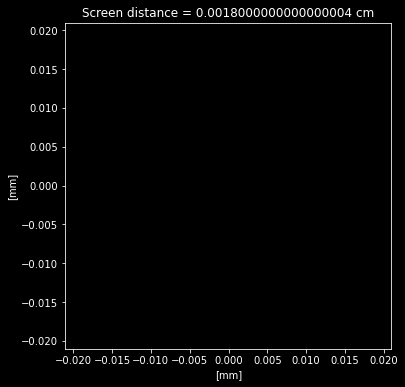

In [49]:
import diffractsim
diffractsim.set_backend("CPU") 
from diffractsim import MonochromaticField,ApertureFromImage, mm, cm, nm

λ = 600 * nm

F = MonochromaticField(
    wavelength=600*nm, extent_x=70*λ, extent_y=70*λ, Nx=1024, Ny=1024,
)

F.add(ApertureFromImage("/Users/emanuelevivoli/asmara/diffractsim/examples/apertures/intensity.png", image_size=(25*λ, 25 *λ), simulation = F, amplitude_mask_extent = [-1,1]))


F.propagate(z=30*λ)
rgb = F.get_colors(scale=1.)

F.plot_colors(rgb)